29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.6931 - loss: 0.8463 - val_accuracy: 0.8564 - val_loss: 0.4082
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.8371 - loss: 0.4499 - val_accuracy: 0.8802 - val_loss: 0.3372
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8639 - loss: 0.3836 - val_accuracy: 0.8907 - val_loss: 0.3143
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8748 - loss: 0.3467 - val_accuracy: 0.8902 - val_loss: 0.3073
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.8871 - loss: 0.3131 - val_accuracy: 0.8943 - val_loss: 0.2865
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.8911 - loss: 0.2976 - val_accuracy: 0.9034 - val_loss: 0.2784
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.8987 - loss: 0.2772 - val_accuracy: 0.9007 - val_loss: 0.2707
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9020 -

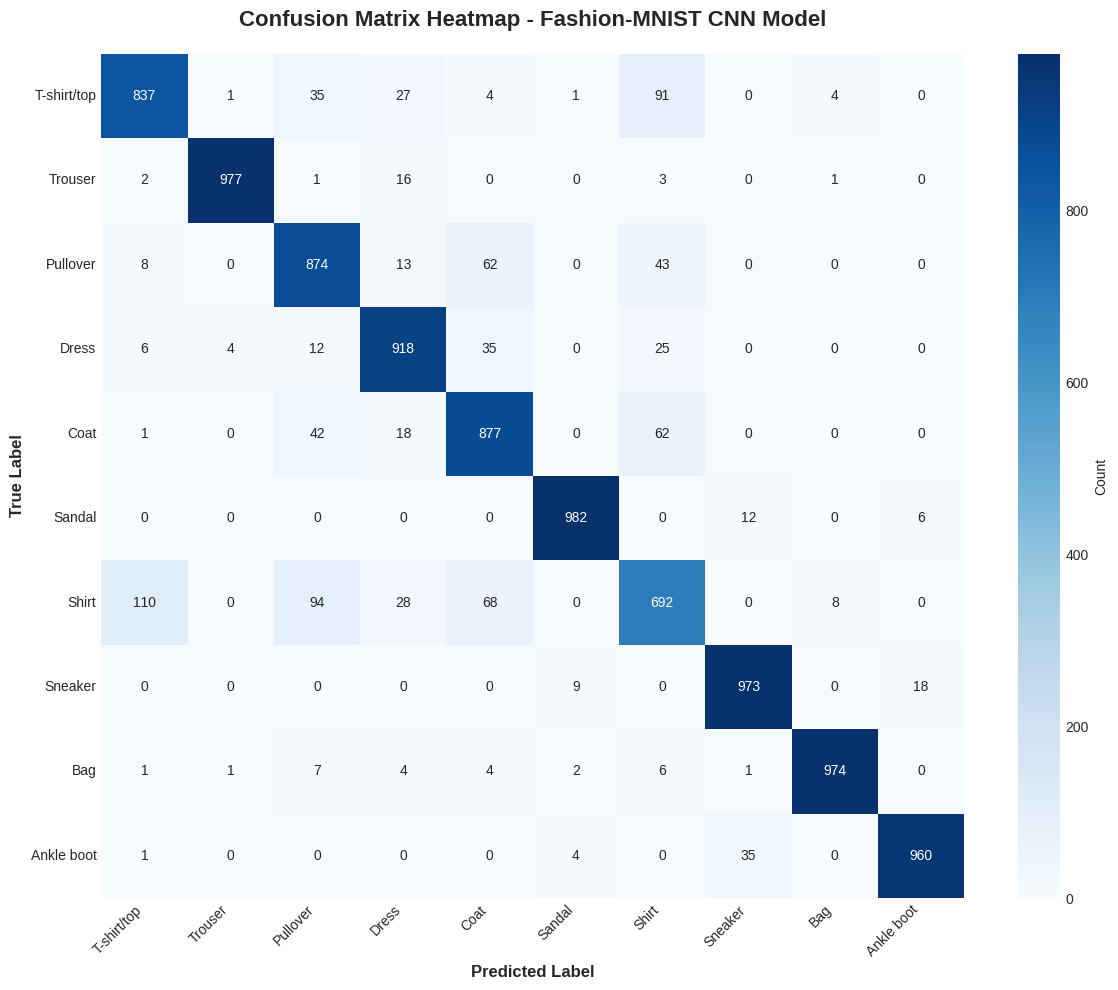

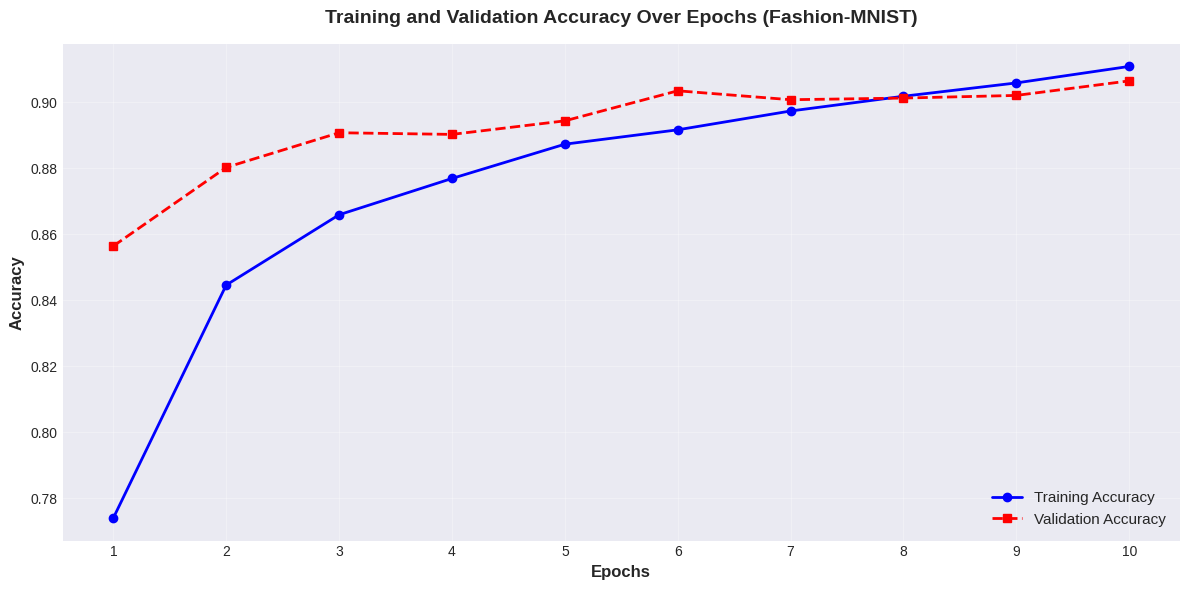

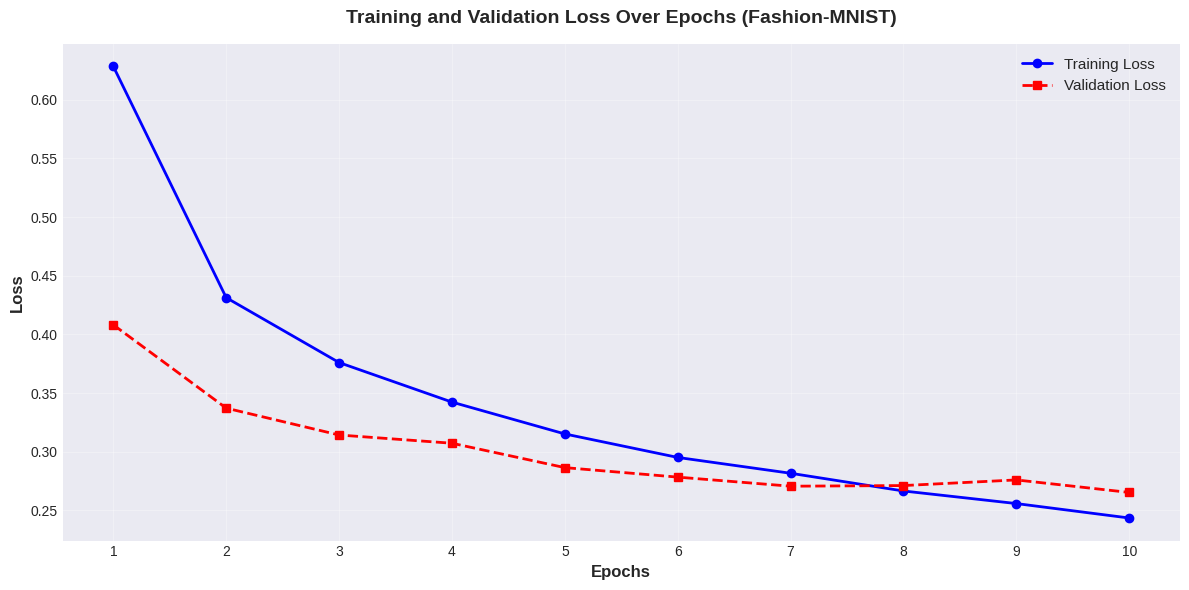

Model saved successfully


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Expand dimensions to add channel axis for CNN input (grayscale images)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to categorical format (One-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output to feed into fully connected layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(64, activation='relu'))

# Dropout Layer to avoid overfitting
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\n{"="*50}')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)')
print(f'{"="*50}\n')

# Make predictions on test set for confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Fashion-MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print classification report
print('\nClassification Report:')
print('='*70)
print(classification_report(y_true, y_pred_classes, target_names=class_names))
print('='*70)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting Section
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Confusion Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix Heatmap - Fashion-MNIST CNN Model', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('fashion_mnist_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Convert the history to a DataFrame
history_df = pd.DataFrame(history.history)

# 2. Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_df.index + 1, history_df['accuracy'], 'b-o', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(history_df.index + 1, history_df['val_accuracy'], 'r--s', label='Validation Accuracy', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Training and Validation Accuracy Over Epochs (Fashion-MNIST)', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(history_df) + 1))
plt.tight_layout()
plt.savefig('fashion_mnist_accuracy_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history_df.index + 1, history_df['loss'], 'b-o', label='Training Loss', linewidth=2, markersize=6)
plt.plot(history_df.index + 1, history_df['val_loss'], 'r--s', label='Validation Loss', linewidth=2, markersize=6)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Training and Validation Loss Over Epochs (Fashion-MNIST)', fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(history_df) + 1))
plt.tight_layout()
plt.savefig('fashion_mnist_loss_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Save Trained Model
model.save('fashion_mnist_cnn_model.h5')
print('Model saved successfully')
